In [124]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Read Data from Excel File
Use pandas to read data from an Excel file into a DataFrame.

In [125]:
# Read data from Excel file into a DataFrame
file_path = 'Splitter-Combiner-Efficiencies.xlsx'  # Replace with your actual file path
sheet_name = 'Sheet1'  # Replace with your actual sheet name if different

# Read the Excel file
df = pd.read_excel(file_path, sheet_name=sheet_name)

print(df)

   Unnamed: 0 Unnamed: 1 Unnamed: 2 Unnamed: 3 Unnamed: 4
0      Nov 25   output 1   output 2   output 3   output 4
1     input 1       77.3       85.7       85.3         85
2     input 2         74       85.2       87.8       84.7
3     input 3       76.3       83.3       82.1       75.4
4     input 4         74       86.4       85.5       87.5
..        ...        ...        ...        ...        ...
81    input 1        NaN        NaN        NaN        NaN
82    input 2        NaN        NaN        NaN        NaN
83    input 3        NaN        NaN        NaN        NaN
84    input 4        NaN        NaN        NaN        NaN
85    input 5        NaN        NaN        NaN        NaN

[86 rows x 5 columns]


# Initialize 3D Matrix
Create a 3D matrix using numpy to hold the data.

In [126]:
# Initialize 3D matrix dimensions
input_ports = 5  # Number of input ports
output_ports = 4  # Number of output ports
dates = ["Nov 25", "Nov 26", "Nov 27", "Dec 4", "Dec 5", "Dec 6", "Dec 9", "Dec 10"]  # Dates for the depth dimension
dates_offset = np.arange(len(dates))*8

# Create an empty 3D matrix to hold the data
matrix = np.zeros((len(dates), input_ports, output_ports))


# Populate 3D Matrix with Data
Populate the 3D matrix with data from the DataFrame.

In [127]:
# Populate 3D Matrix with Data

# Populate the 3D matrix with data from the DataFrame
for i in range(len(dates)):
    for j in range(input_ports):
        for k in range(output_ports):
            value = df.iloc[dates_offset[i]+1+j, k+1]
            matrix[i, j, k] = value  

# Display the 3D matrix to verify the data
print("All Data. Row = Input. Col = Output. Depth = Date")
print(matrix)

All Data. Row = Input. Col = Output. Depth = Date
[[[77.3 85.7 85.3 85. ]
  [74.  85.2 87.8 84.7]
  [76.3 83.3 82.1 75.4]
  [74.  86.4 85.5 87.5]
  [82.  90.4 87.9 86. ]]

 [[77.  84.6 84.6 85.3]
  [74.3 81.  84.7 81.4]
  [73.9 80.2 79.4 73.7]
  [70.2 88.7 85.3 87.6]
  [81.2 87.5 86.6 84. ]]

 [[75.7 85.6 86.2 82.1]
  [75.1 83.3 87.8 84.2]
  [73.7 82.5 81.3 73.2]
  [69.1 88.3 84.9 76.9]
  [81.7 89.5 87.3 82.1]]

 [[78.8 88.5 86.3 87.1]
  [77.6 86.6 89.8 88.9]
  [77.  85.4 83.6 78.7]
  [76.5 89.6 87.3 83.2]
  [85.7 93.2 90.5 87.6]]

 [[79.8 89.9 88.3 86.2]
  [77.8 86.6 89.9 90. ]
  [76.1 84.4 84.5 78.3]
  [74.7 91.2 87.4 78.4]
  [85.2 93.5 91.2 86.4]]

 [[80.8 89.8 84.3 85.4]
  [76.8 86.6 89.7 90.1]
  [75.7 86.5 82.5 77. ]
  [70.6 89.9 82.2 82.3]
  [84.7 93.4 91.2 88.4]]

 [[79.  89.1 87.3 87.4]
  [75.2 86.6 90.5 89.3]
  [76.9 85.8 83.1 76.9]
  [75.8 90.3 84.8 80.8]
  [84.4 93.9 91.1 88.1]]

 [[78.6 89.4 86.2 87.4]
  [78.3 86.2 90.2 88.4]
  [79.  85.2 83.5 77.7]
  [76.8 91.5 84.9 81.3]


In [128]:
# Set default font size for all text elements
plt.rcParams.update({'font.size': 14})

# Compute average output across dates

Plot result as a bar graph with error bars.

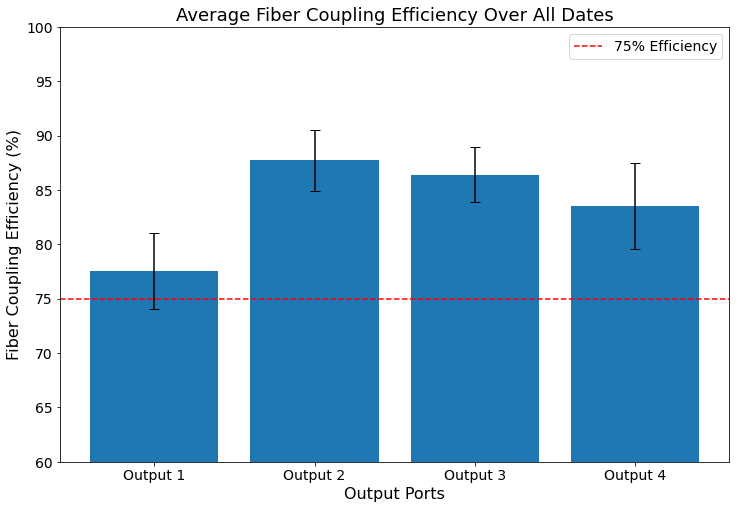

Output Averaged Across All Dates
[77.5625 87.74   86.42   83.56  ]
Std Dev of Output Averaged Across All Dates
[3.46852815 2.82230402 2.51483846 3.96525062]


In [129]:
avgs1 = np.mean(np.mean(matrix, axis=0), axis=0)
std_devs1 = np.std(np.mean(matrix, axis=0), axis=0)
plt.figure(figsize=(12, 8))  # Set the figure size
plt.bar(np.arange(output_ports), avgs1, yerr=std_devs1, capsize=5)
plt.xticks(np.arange(output_ports), ['Output 1', 'Output 2', 'Output 3', 'Output 4'])
plt.ylim(60, 100)  # Set y-axis limits
plt.xlabel('Output Ports', fontsize=16)
plt.ylabel('Fiber Coupling Efficiency (%)', fontsize=16)
plt.title('Average Fiber Coupling Efficiency Over All Dates', fontsize=18)
plt.axhline(y=75, color='red', linestyle='--', label='75% Efficiency')
plt.legend(loc='upper right', fontsize=14)  # Adjust legend position
plt.show()
print("Output Averaged Across All Dates")
print(avgs1)
print("Std Dev of Output Averaged Across All Dates")
print(std_devs1)

# Compute average for each output, plot across dates

Average of Each Output (Col) Per Day (Row)
[[76.72 86.2  85.72 83.72]
 [75.32 84.4  84.12 82.4 ]
 [75.06 85.84 85.5  79.7 ]
 [79.12 88.66 87.5  85.1 ]
 [78.72 89.12 88.26 83.86]
 [77.72 89.24 85.98 84.64]
 [78.26 89.14 87.36 84.5 ]
 [79.58 89.32 86.92 84.56]]


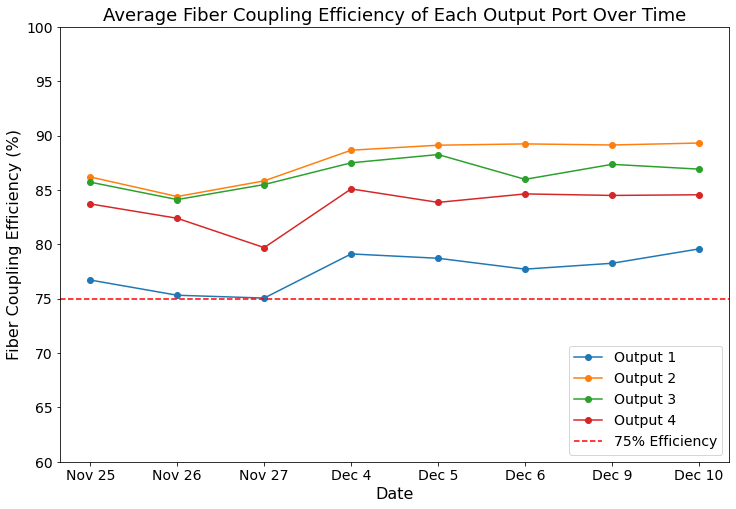

In [130]:
#plot the following: in separate plots, 11, 21, 31, 41, 51 across all dates

avgs2 = np.mean(matrix, axis=1)
print("Average of Each Output (Col) Per Day (Row)")
print(avgs2)

plt.figure(figsize=(12, 8))  # Set the figure size

for i in range(avgs2.shape[1]):
    plt.plot(dates, avgs2[:, i], marker='o', label=f'Output {i+1}')

plt.axhline(y=75, color='red', linestyle='--', label='75% Efficiency')
plt.xlabel('Date', fontsize=16)
plt.ylabel('Fiber Coupling Efficiency (%)', fontsize=16)
plt.title('Average Fiber Coupling Efficiency of Each Output Port Over Time', fontsize=18)
plt.legend(loc = 'lower right', fontsize=14)
plt.ylim(60, 100)  # Set y-axis limit to 100
plt.show()

# Compute for each individual output, plot across dates

Input 1 Output 1 Data Over Time
[77.3 77.  75.7 78.8 79.8 80.8 79.  78.6]
Input 2 Output 1 Data Over Time
[74.  74.3 75.1 77.6 77.8 76.8 75.2 78.3]
Input 3 Output 1 Data Over Time
[76.3 73.9 73.7 77.  76.1 75.7 76.9 79. ]
Input 4 Output 1 Data Over Time
[74.  70.2 69.1 76.5 74.7 70.6 75.8 76.8]
Input 5 Output 1 Data Over Time
[82.  81.2 81.7 85.7 85.2 84.7 84.4 85.2]


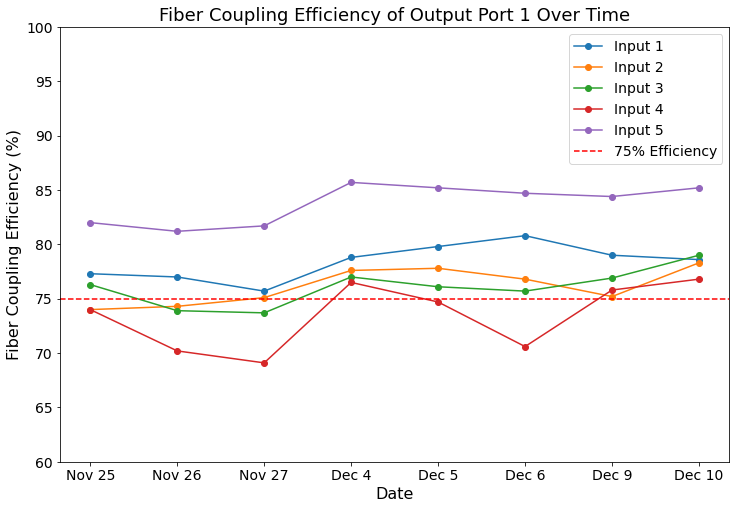

Input 1 Output 2 Data Over Time
[85.7 84.6 85.6 88.5 89.9 89.8 89.1 89.4]
Input 2 Output 2 Data Over Time
[85.2 81.  83.3 86.6 86.6 86.6 86.6 86.2]
Input 3 Output 2 Data Over Time
[83.3 80.2 82.5 85.4 84.4 86.5 85.8 85.2]
Input 4 Output 2 Data Over Time
[86.4 88.7 88.3 89.6 91.2 89.9 90.3 91.5]
Input 5 Output 2 Data Over Time
[90.4 87.5 89.5 93.2 93.5 93.4 93.9 94.3]


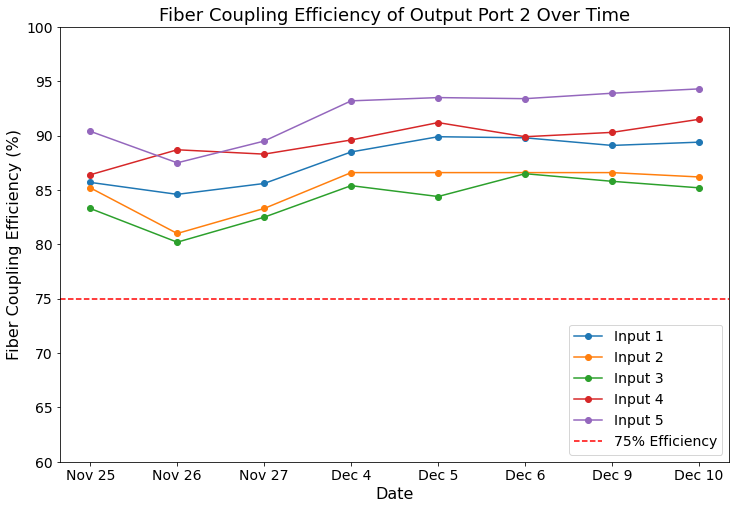

Input 1 Output 3 Data Over Time
[85.3 84.6 86.2 86.3 88.3 84.3 87.3 86.2]
Input 2 Output 3 Data Over Time
[87.8 84.7 87.8 89.8 89.9 89.7 90.5 90.2]
Input 3 Output 3 Data Over Time
[82.1 79.4 81.3 83.6 84.5 82.5 83.1 83.5]
Input 4 Output 3 Data Over Time
[85.5 85.3 84.9 87.3 87.4 82.2 84.8 84.9]
Input 5 Output 3 Data Over Time
[87.9 86.6 87.3 90.5 91.2 91.2 91.1 89.8]


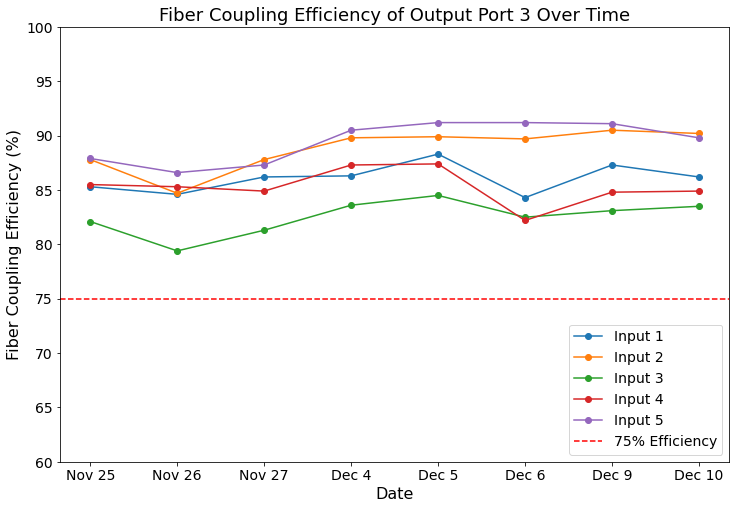

Input 1 Output 4 Data Over Time
[85.  85.3 82.1 87.1 86.2 85.4 87.4 87.4]
Input 2 Output 4 Data Over Time
[84.7 81.4 84.2 88.9 90.  90.1 89.3 88.4]
Input 3 Output 4 Data Over Time
[75.4 73.7 73.2 78.7 78.3 77.  76.9 77.7]
Input 4 Output 4 Data Over Time
[87.5 87.6 76.9 83.2 78.4 82.3 80.8 81.3]
Input 5 Output 4 Data Over Time
[86.  84.  82.1 87.6 86.4 88.4 88.1 88. ]


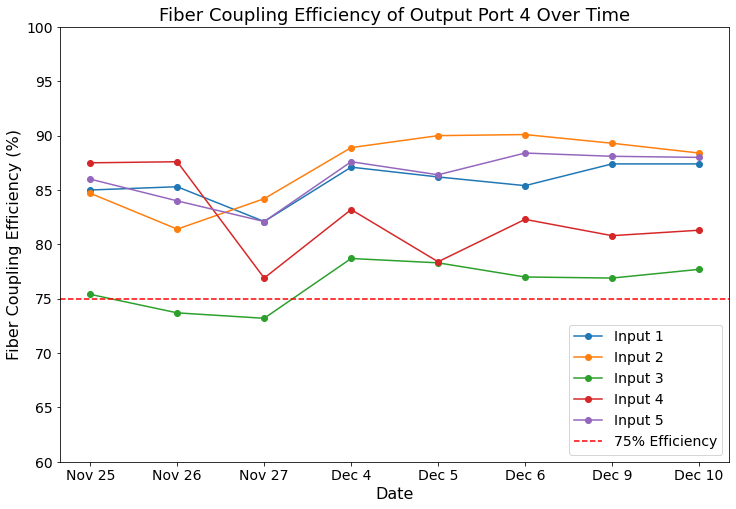

In [131]:
for i in range(output_ports):
    plt.figure(figsize=(12, 8))  # Set the figure size
    for j in range(input_ports):
        plt.plot(dates, matrix[:, j, i], marker='o', label=f'Input {j+1}')
        print(f"Input {j+1} Output {i+1} Data Over Time")
        print(matrix[:, j, i])

    plt.axhline(y=75, color='red', linestyle='--', label='75% Efficiency')
    plt.xlabel('Date', fontsize=16)
    plt.ylabel('Fiber Coupling Efficiency (%)', fontsize=16)
    plt.title('Fiber Coupling Efficiency of Output Port ' + str(i+1) + ' Over Time', fontsize=18)
    if i == 0:
        plt.legend(loc='upper right')  # Adjust legend position
    else:
        plt.legend(loc='lower right')
    plt.ylim(60, 100)  # Set y-axis limit to 100
    plt.show()